In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from statsmodels.formula.api import ols

ad_conversion = pd.read_csv('ad_conversion.csv')

In [2]:
# Create qdrt_n_impressions and qdrt_n_clicks
ad_conversion["qdrt_n_impressions"] = ad_conversion['n_impressions'] ** 0.25
ad_conversion["qdrt_n_clicks"] = ad_conversion['n_clicks'] ** 0.25

# Run a linear regression of your transformed variables
mdl_click_vs_impression = ols("qdrt_n_clicks ~ qdrt_n_impressions", data=ad_conversion, ci=None).fit()

# Use this explanatory data
explanatory_data = pd.DataFrame({"qdrt_n_impressions": np.arange(0, 3e6+1, 5e5) ** .25,
                                 "n_impressions": np.arange(0, 3e6+1, 5e5)})

# Complete prediction_data
prediction_data = explanatory_data.assign(
    qdrt_n_clicks = mdl_click_vs_impression.predict(explanatory_data)
)

# Back transform qdrt_n_clicks
prediction_data["n_clicks"] = prediction_data["qdrt_n_clicks"] ** 4
print(prediction_data)

   qdrt_n_impressions  n_impressions  qdrt_n_clicks    n_clicks
0            0.000000            0.0       0.071748    0.000026
1           26.591479       500000.0       3.037576   85.135121
2           31.622777      1000000.0       3.598732  167.725102
3           34.996355      1500000.0       3.974998  249.659131
4           37.606031      2000000.0       4.266063  331.214159
5           39.763536      2500000.0       4.506696  412.508546
6           41.617915      3000000.0       4.713520  493.607180


c:\Users\crist\anaconda3\envs\Machine_Learning_38\lib\site-packages\statsmodels\base\model.py:127: ValueWarning: unknown kwargs ['ci']
  warnings.warn(msg, ValueWarning)


In [3]:
print(ad_conversion.head())

# creating the models
mdl_click_vs_impression_orig = ols('n_clicks ~ n_impressions' , data = ad_conversion).fit()

mdl_click_vs_impression_trans = ols('qdrt_n_clicks ~ qdrt_n_impressions  ' , data = ad_conversion).fit()

   spent_usd  n_impressions  n_clicks  qdrt_n_impressions  qdrt_n_clicks
0       1.43         7350.0       1.0            9.259165       1.000000
1       1.82        17861.0       2.0           11.560495       1.189207
2       1.25         4259.0       1.0            8.078429       1.000000
3       1.29         4133.0       1.0            8.018006       1.000000
4       4.77        15615.0       3.0           11.178551       1.316074


## Coefficient of determination
The coefficient of determination is a measure of how well the linear regression line fits the observed values. For simple linear regression, it is equal to the square of the correlation between the explanatory and response variables.

Here, you'll take another look at the second stage of the advertising pipeline: modeling the click response to impressions. Two models are available: mdl_click_vs_impression_orig models n_clicks versus n_impressions. mdl_click_vs_impression_trans is the transformed model you saw in Chapter 2. It models n_clicks to the power of 0.25 versus n_impressions to the power of 0.25.

Instructions
+ Print the summary of mdl_click_vs_impression_orig.
+ Do the same for mdl_click_vs_impression_trans.
+ Print the coefficient of determination for mdl_click_vs_impression_orig.
+ Do the same for mdl_click_vs_impression_trans.

In [4]:
# Print a summary of mdl_click_vs_impression_orig
print(mdl_click_vs_impression_orig.summary())

# Print a summary of mdl_click_vs_impression_trans
print(mdl_click_vs_impression_trans.summary())

                            OLS Regression Results                            
Dep. Variable:               n_clicks   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     7683.
Date:                Tue, 02 May 2023   Prob (F-statistic):               0.00
Time:                        14:16:16   Log-Likelihood:                -4126.7
No. Observations:                 936   AIC:                             8257.
Df Residuals:                     934   BIC:                             8267.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.6829      0.789      2.133

In [5]:
# Print the coeff of determination for mdl_click_vs_impression_orig
print(mdl_click_vs_impression_orig.rsquared)

# Print the coeff of determination for mdl_click_vs_impression_trans
print(mdl_click_vs_impression_trans.rsquared)

0.8916134973508041
0.9445272817143905


#### Question
+ mdl_click_vs_impression_orig has a coefficient of determination of 0.89. Which statement about the model is true?

#### Answer
+ The number of impressions explains 89% of the variability in the number of clicks.

#### Question
+ Which model does the coefficient of determination suggest gives a better fit?

#### Answer
+ The transformed model, mdl_click_vs_impression_trans.


## Residual standard error
Residual standard error (RSE) is a measure of the typical size of the residuals. Equivalently, it's a measure of how wrong you can expect predictions to be. Smaller numbers are better, with zero being a perfect fit to the data.

Again, you'll look at the models from the advertising pipeline, mdl_click_vs_impression_orig and mdl_click_vs_impression_trans.

#### Instructions 1/3
+ Calculate the MSE of mdl_click_vs_impression_orig, assigning to mse_orig.
+ Using mse_orig, calculate and print the RSE of mdl_click_vs_impression_orig.
+ Do the same for mdl_click_vs_impression_trans.

In [6]:
# Calculate mse_orig for mdl_click_vs_impression_orig
mse_orig = mdl_click_vs_impression_orig.mse_resid

# Calculate rse_orig for mdl_click_vs_impression_orig and print it
rse_orig = np.sqrt(mse_orig)
print("RSE of original model: ", rse_orig)

# Calculate mse_trans for mdl_click_vs_impression_trans
mse_trans = mdl_click_vs_impression_trans.mse_resid

# Calculate rse_trans for mdl_click_vs_impression_trans and print it
rse_trans = np.sqrt(mse_trans)
print("RSE of transformed model: ", rse_trans)

RSE of original model:  19.905838862478138
RSE of transformed model:  0.19690640896875727


#### Question
mdl_click_vs_impression_orig has an RSE of about 20. Which statement is true?

#### Answer
+ The typical difference between observed number of clicks and predicted number of clicks is 20.

#### Question
Which model does the RSE suggest gives more accurate predictions? mdl_click_vs_impression_orig has an RSE of about 20, mdl_click_vs_impression_trans has an RSE of about 0.2.

#### Answer
+ The transformed model, mdl_click_vs_impression_trans.

In [7]:
# import dataset
taiwan_real_estate = pd.read_csv('taiwan_real_estate.csv')

# Create the model object 
mdl_price_vs_conv = ols('price_twd_msq~n_convenience', data=taiwan_real_estate).fit()

## Drawing diagnostic plots
It's time for you to draw these diagnostic plots yourself using the Taiwan real estate dataset and the model of house prices versus number of convenience stores.

taiwan_real_estate is available as a pandas DataFrame and mdl_price_vs_conv is available.

Instructions

+ Create the residuals versus fitted values plot. Add a lowess argument to visualize the trend of the residuals.
+ Import qqplot() from statsmodels.api.
+ Create the Q-Q plot of the residuals.
+ Create the scale-location plot.

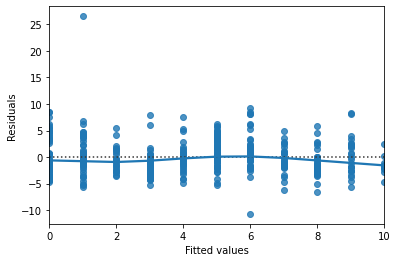

In [8]:
# Plot the residuals vs. fitted values
sns.residplot(x='n_convenience', y='price_twd_msq', data=taiwan_real_estate, lowess=True)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")

# Show the plot
plt.show()

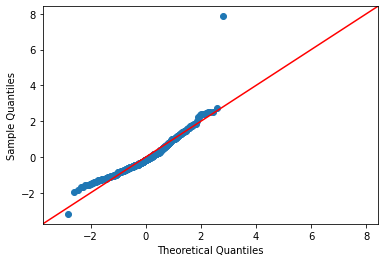

In [9]:
# Import qqplot
from statsmodels.api import qqplot

# Create the Q-Q plot of the residuals
qqplot(data=mdl_price_vs_conv.resid, fit=True, line="45")

# Show the plot
plt.show()

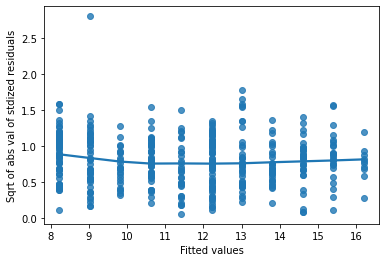

In [10]:
# Preprocessing steps
model_norm_residuals = mdl_price_vs_conv.get_influence().resid_studentized_internal
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# Create the scale-location plot
sns.regplot(x=mdl_price_vs_conv.fittedvalues, y=model_norm_residuals_abs_sqrt, ci=None, lowess=True)
plt.xlabel("Fitted values")
plt.ylabel("Sqrt of abs val of stdized residuals")

# Show the plot
plt.show()

## Leverage
Leverage measures how unusual or extreme the explanatory variables are for each observation. Very roughly, high leverage means that the explanatory variable has values that are different from other points in the dataset. In the case of simple linear regression, where there is only one explanatory value, this typically means values with a very high or very low explanatory value.

Here, you'll look at highly leveraged values in the model of house price versus the square root of distance from the nearest MRT station in the Taiwan real estate dataset.

Guess which observations you think will have a high leverage, then move the slider to find out.

## Influence
Influence measures how much a model would change if each observation was left out of the model calculations, one at a time. That is, it measures how different the prediction line would look if you would run a linear regression on all data points except that point, compared to running a linear regression on the whole dataset.

## Extracting leverage and influence
In the last few exercises, you explored which observations had the highest leverage and influence. Now you'll extract those values from the model.

mdl_price_vs_dist and taiwan_real_estate are available.

## Instructions 
+ Get the summary frame from mdl_price_vs_dist and save as summary_info.
+ Add the hat_diag column of summary_info to taiwan_real_estate as the leverage column.
+ Sort taiwan_real_estate by leverage in descending order and print the head.


In [12]:


# Create sqrt_dist_to_mrt_m
taiwan_real_estate["sqrt_dist_to_mrt_m"] = np.sqrt(taiwan_real_estate["dist_to_mrt_m"])

# Run a linear regression of price_twd_msq vs. square root of dist_to_mrt_m using taiwan_real_estate
mdl_price_vs_dist = ols('price_twd_msq ~ sqrt_dist_to_mrt_m', data=taiwan_real_estate).fit()

# Print the parameters
print(mdl_price_vs_dist.params)

Intercept             16.709799
sqrt_dist_to_mrt_m    -0.182843
dtype: float64


In [14]:
# Create summary_info
summary_info = mdl_price_vs_dist.get_influence().summary_frame()

# Add the hat_diag column to taiwan_real_estate, name it leverage
taiwan_real_estate["leverage"] = summary_info['hat_diag']

# Sort taiwan_real_estate by leverage in descending order and print the head
print(taiwan_real_estate.sort_values(by='leverage', ascending=False).head())

     dist_to_mrt_m  n_convenience house_age_years  price_twd_msq  \
347       6488.021              1        15 to 30       3.388805   
116       6396.283              1        30 to 45       3.691377   
249       6306.153              1        15 to 30       4.538578   
255       5512.038              1        30 to 45       5.264750   
8         5512.038              1        30 to 45       5.688351   

     sqrt_dist_to_mrt_m  leverage  
347           80.548253  0.026665  
116           79.976765  0.026135  
249           79.411290  0.025617  
255           74.243101  0.021142  
8             74.243101  0.021142  


## Instructions
+ Add the cooks_d column from summary_info to taiwan_real_estate as the cooks_dist column.
+ Sort taiwan_real_estate by cooks_dist in descending order and print the head.

In [15]:
# Create summary_info
summary_info = mdl_price_vs_dist.get_influence().summary_frame()

# Add the hat_diag column to taiwan_real_estate, name it leverage
taiwan_real_estate["leverage"] = summary_info["hat_diag"]

# Add the cooks_d column to taiwan_real_estate, name it cooks_dist
taiwan_real_estate["cooks_dist"] = summary_info["cooks_d"]

# Sort taiwan_real_estate by cooks_dist in descending order and print the head.
print(taiwan_real_estate.sort_values("cooks_dist", ascending=False).head())

     dist_to_mrt_m  n_convenience house_age_years  price_twd_msq  \
270       252.5822              1         0 to 15      35.552194   
148      3780.5900              0        15 to 30      13.645991   
228      3171.3290              0         0 to 15      14.099849   
220       186.5101              9        30 to 45      23.691377   
113       393.2606              6         0 to 15       2.299546   

     sqrt_dist_to_mrt_m  leverage  cooks_dist  
270           15.892835  0.003849    0.115549  
148           61.486503  0.012147    0.052440  
228           56.314554  0.009332    0.035384  
220           13.656870  0.004401    0.025123  
113           19.830799  0.003095    0.022813  
